# **Linear Regression**

* Linear regression is a classic supervised learning algorithm used for predicting continuous values. It models the relationship between an independent variable (input, *X*) and a dependent variable (output, *Y*).

**1) Mathematical foundation**

The equation of a simple linear regression (with one feature) is:

$Y = wX + b$

where:

- *Y* is the predicted output;
- *X* is the input feature;
- *w* is the weight (slope of the line);
- *b* is the bias (intercept).

For multiple features (*n* features), the equation can be generalized to:

$Y = w_1X_1 + w_2X_2 + ... + w_nX_n + b$

**2) Cost function**

To measure how well our model is performing, we use the Mean Squared Error (MSE):

$MSE = \frac{1}{m}\sum_{i=1}^{m}(Y_i - \hat{Y_i})^2$

where:

- *m* is the number of samples;
- *$Y_i$* is the actual output;
- *$\hat{Y_i}$* is the predicted output.

Our goal is to minimize this cost function.

**3) Optimization (Gradient Descent)**

We optimize *w* and *b* using Gradient Descent, which updates parameters iteratively:

$w:=w-\alpha \frac{\partial J}{\partial w}$

$b:=b-\alpha \frac{\partial J}{\partial b}$

where:

- $\alpha$ (learning rate) controls the step size;
- $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ are gradients of the cost function.

The gradients are computed as:

$\frac{\partial J}{\partial w} = -\frac{2}{m}\sum (Y_i - \hat{Y_i})X_i$

$\frac{\partial J}{\partial b} = -\frac{2}{m}\sum (Y_i - \hat{Y_i})$

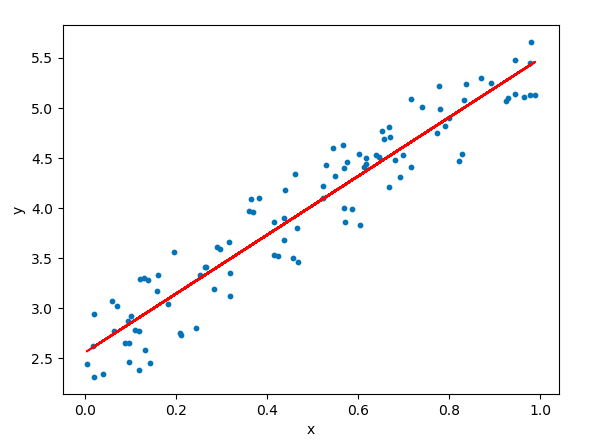

# **Python implementation from scratch**

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Generate and normalize dataset**

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear regression from scratch**

In [3]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.losses = []

    def compute_cost(self, X, y):
        m = len(y)
        y_pred = X.dot(self.w) + self.b  # Y = wX + b
        return (1 / (2 * m)) * np.sum((y_pred - y) ** 2)  # cost function

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros((n, 1))
        self.b = 0

        for epoch in range(self.epochs):
            y_pred = X.dot(self.w) + self.b
            dw = (1 / m) * X.T.dot(y_pred - y)  # gradient w
            db = (1 / m) * np.sum(y_pred - y)   # gradient b

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            loss = self.compute_cost(X, y)
            self.losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return X.dot(self.w) + self.b

**Train the model**

In [4]:
model = LinearRegressionGD(learning_rate=0.1, epochs=1000)
model.fit(X_train_scaled, y_train)

Epoch 0, Loss: 20.0280
Epoch 100, Loss: 0.4238
Epoch 200, Loss: 0.4238
Epoch 300, Loss: 0.4238
Epoch 400, Loss: 0.4238
Epoch 500, Loss: 0.4238
Epoch 600, Loss: 0.4238
Epoch 700, Loss: 0.4238
Epoch 800, Loss: 0.4238
Epoch 900, Loss: 0.4238


**Visualize the training loss**

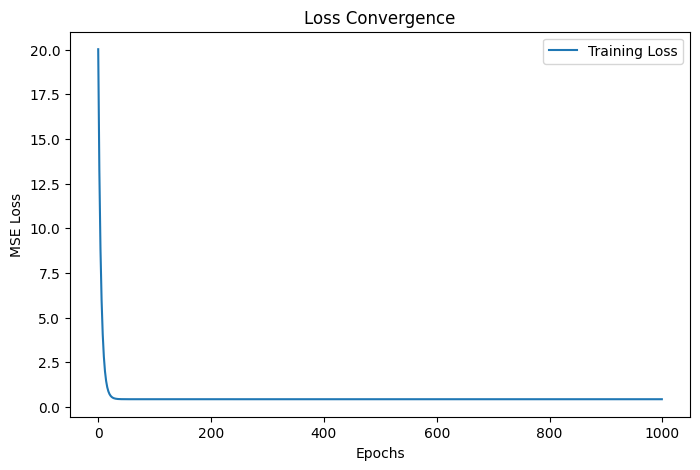

In [5]:
plt.figure(figsize=(8,5))
plt.plot(model.losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Convergence")
plt.legend()
plt.show()

**Visualize predictions**

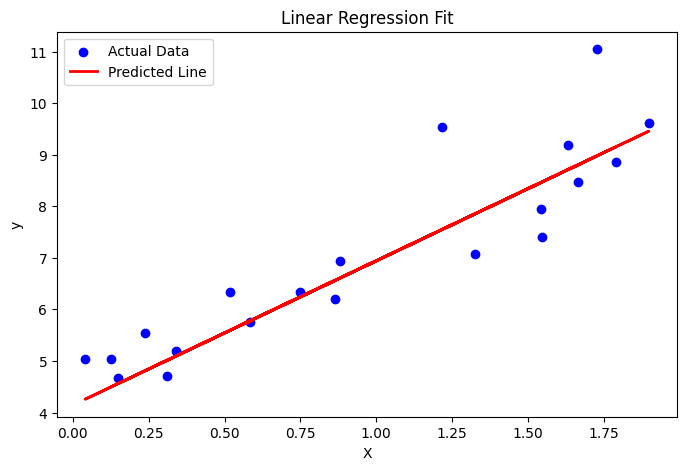

In [6]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()